## scienceplots

Current order of colors in Matplotlib: ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']


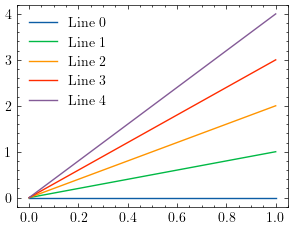

In [6]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use("science")

# Access the default color cycle
color_cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Print the current order of colors
print("Current order of colors in Matplotlib:", color_cycle)

# test the color cycle
plt.figure()
for i in range(5):
    plt.plot([0, 1], [0, i], label=f"Line {i}")
plt.legend()
plt.show()

## ratio

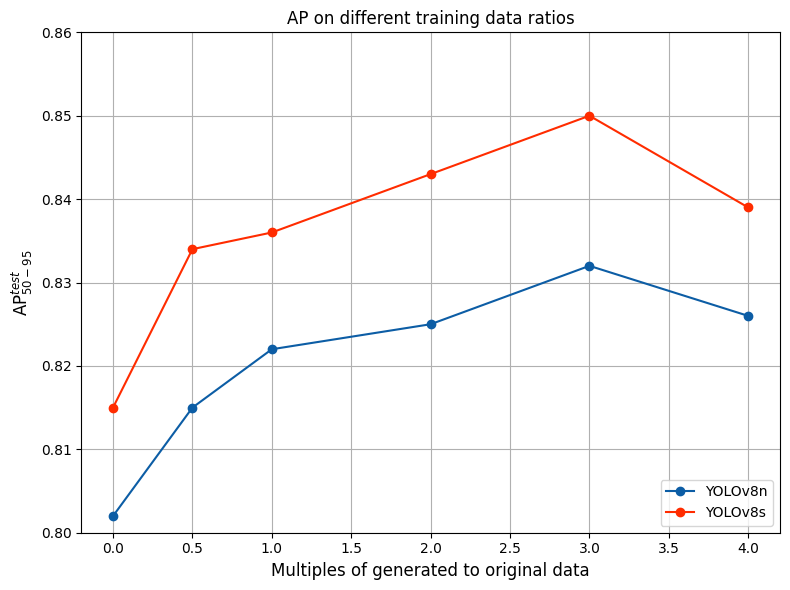

In [1]:
import matplotlib.pyplot as plt

# import scienceplots

# plt.style.use('science')
# color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

color_cycle = [
    "#0C5DA5",
    "#00B945",
    "#FF9500",
    "#FF2C00",
    "#845B97",
    "#474747",
    "#9e9e9e",
]

plt.rcParams["legend.loc"] = "lower right"

# data
r = [0, 0.5, 1, 2, 3, 4]
v8n = [0.802, 0.815, 0.822, 0.825, 0.832, 0.826]
v8s = [0.815, 0.834, 0.836, 0.843, 0.850, 0.839]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(
    r,
    v8n,
    marker="o",
    label="YOLOv8n",
    linewidth=1.5,
    markersize=6,
    color=color_cycle[0],
)
plt.plot(
    r,
    v8s,
    marker="o",
    label="YOLOv8s",
    linewidth=1.5,
    markersize=6,
    color=color_cycle[3],
)

# Labels and legend
plt.xlabel("Multiples of generated to original data", fontsize=12)
plt.ylabel(r"AP$^{test}_{50-95}$", fontsize=12)
plt.legend()
plt.ylim(0.8, max(max(v8n), max(v8s)) + 0.01)
plt.title("AP on different training data ratios", fontsize=12)

# Suitable for paper
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig("ratio.png", dpi=300)

plt.show()

## yolo

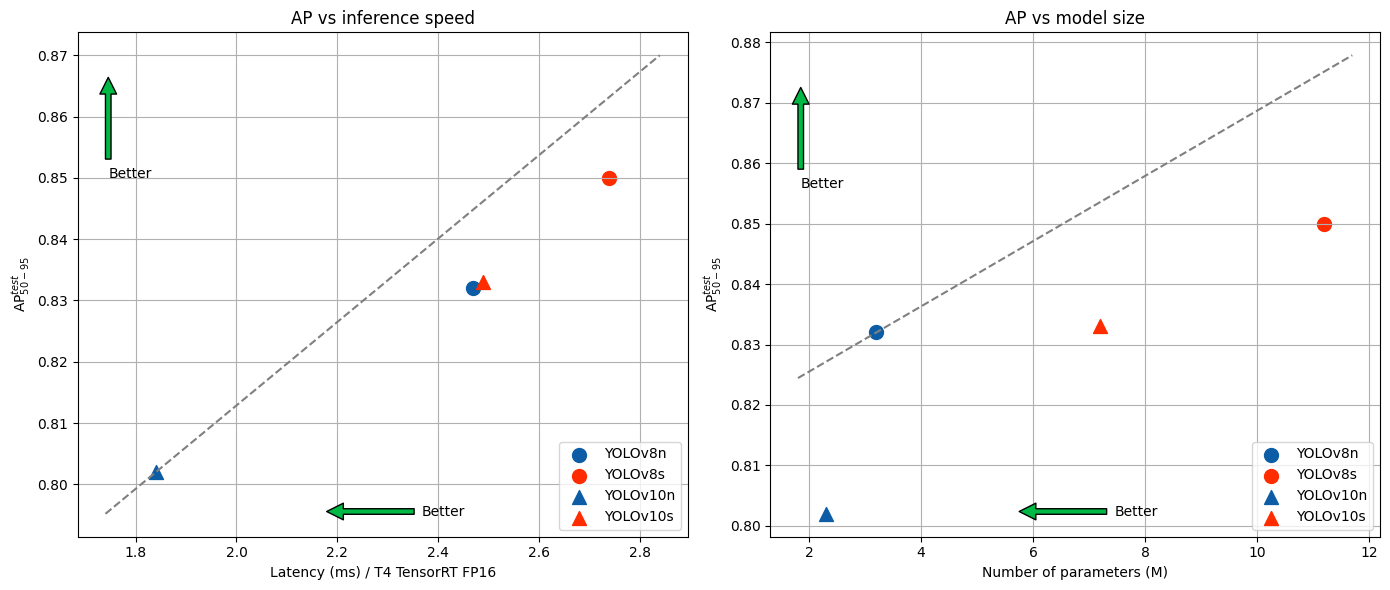

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["legend.loc"] = "lower right"

# Data
latency = [2.47, 2.74, 1.84, 2.49]
params = [3.2, 11.2, 2.3, 7.2]
aps = [0.832, 0.850, 0.802, 0.833]
models = ["YOLOv8n", "YOLOv8s", "YOLOv10n", "YOLOv10s"]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot AP vs inference speed
colors = {
    "n": "#0C5DA5",
    "s": "#FF2C00",
}
shapes = {"YOLOv8": "o", "YOLOv10": "^"}

for i, model in enumerate(models):
    version = model[:-1]
    size = model[-1]
    color = colors[size]
    shape = shapes[version]
    ax1.scatter(latency[i], aps[i], color=color, marker=shape, s=100, label=model)

# Adding line passing through v10n, inferred by v8s and v10s
m = (aps[1] - aps[3]) / (latency[1] - latency[3])
b = aps[2] - m * latency[2]
x_range = np.linspace(min(latency) - 0.1, max(latency) + 0.1, 100)
ax1.plot(x_range, m * x_range + b, linestyle="--", color="gray")
ax1.set_title("AP vs inference speed")
ax1.set_xlabel("Latency (ms) / T4 TensorRT FP16")
ax1.set_ylabel(r"AP$^{test}_{50-95}$")
ax1.grid(True)

# Adding arrows for preferred direction
ax1.annotate(
    "Better",
    xy=(0.05, 0.92),
    xycoords="axes fraction",
    xytext=(0.05, 0.72),
    textcoords="axes fraction",
    arrowprops=dict(facecolor="#00B945", shrink=0.05),
    horizontalalignment="left",
    verticalalignment="center",
)
ax1.annotate(
    "Better",
    xy=(0.4, 0.05),
    xycoords="axes fraction",
    xytext=(0.6, 0.05),
    textcoords="axes fraction",
    arrowprops=dict(facecolor="#00B945", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)

# Plot AP vs Params
for i, model in enumerate(models):
    version = model[:-1]
    size = model[-1]
    color = colors[size]
    shape = shapes[version]
    ax2.scatter(params[i], aps[i], color=color, marker=shape, s=100, label=model)

# Adding slash line passing through v8n, inferred by v8s and v10n
m = (aps[1] - aps[2]) / (params[1] - params[2])
b = aps[0] - m * params[0]
x_range = np.linspace(min(params) - 0.5, max(params) + 0.5, 100)
ax2.plot(x_range, m * x_range + b, linestyle="--", color="gray")
ax2.set_title("AP vs model size")
ax2.set_xlabel("Number of parameters (M)")
ax2.set_ylabel(r"AP$^{test}_{50-95}$")
ax2.grid(True)

# Adding arrows for preferred direction
ax2.annotate(
    "Better",
    xy=(0.05, 0.9),
    xycoords="axes fraction",
    xytext=(0.05, 0.7),
    textcoords="axes fraction",
    arrowprops=dict(facecolor="#00B945", shrink=0.05),
    horizontalalignment="left",
    verticalalignment="center",
)
ax2.annotate(
    "Better",
    xy=(0.4, 0.05),
    xycoords="axes fraction",
    xytext=(0.6, 0.05),
    textcoords="axes fraction",
    arrowprops=dict(facecolor="#00B945", shrink=0.05),
    horizontalalignment="center",
    verticalalignment="center",
)

# Adding legends
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys())
handles, labels = ax2.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax2.legend(by_label.values(), by_label.keys())

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig("yolo.png", dpi=300)

plt.show()

## gpt4o

In [1]:
from utils import load_image, annotate
import matplotlib.pyplot as plt
import numpy as np

In [10]:
img_path = "../examples/00001.jpg"
img = load_image(img_path, size=800)
label_dict = {
    "boxes": [
        [
            0.2997225224971771,
            0.6586688756942749,
            0.39139434695243835,
            0.2049611657857895,
        ],
        [
            0.5473994612693787,
            0.4699993133544922,
            0.4211714267730713,
            0.250853031873703,
        ],
    ],
    "logits": [0.7762131690979004, 0.7161567807197571],
    "classes": ["articulated dump truck", "crawler excavator"],
}
response_gpt = {
    "boxes": [
        [0.1530, 0.5535, 0.2060, 0.2585],
        [0.3825, 0.4550, 0.2580, 0.3000],
    ],
    "classes": ["articulated dump truck by GPT-4o", "crawler excavator by GPT-4o"],
}

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


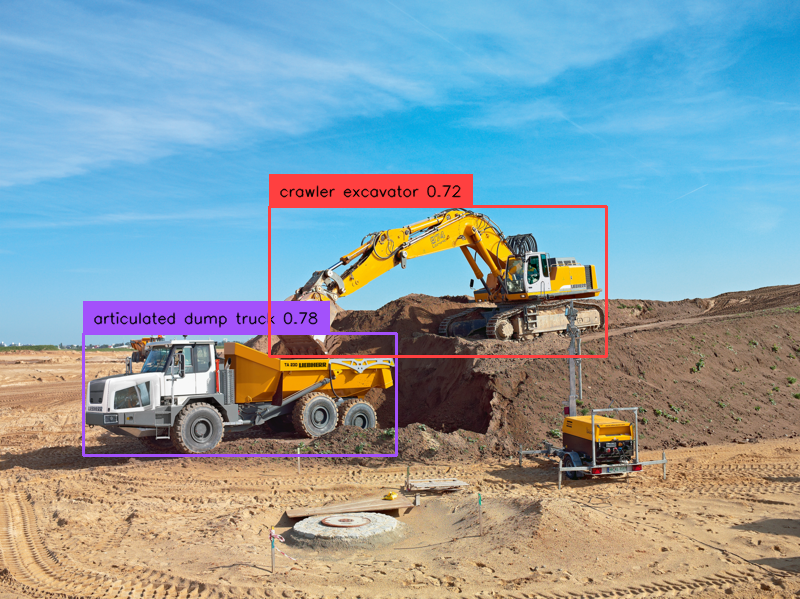

In [18]:
boxes_xywh = label_dict["boxes"]
logits = label_dict["logits"]
classes = label_dict["classes"]
annotated_frame = annotate(img, boxes_xywh, logits, classes)
annotated_frame.save("ann_2.png")
annotated_frame

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


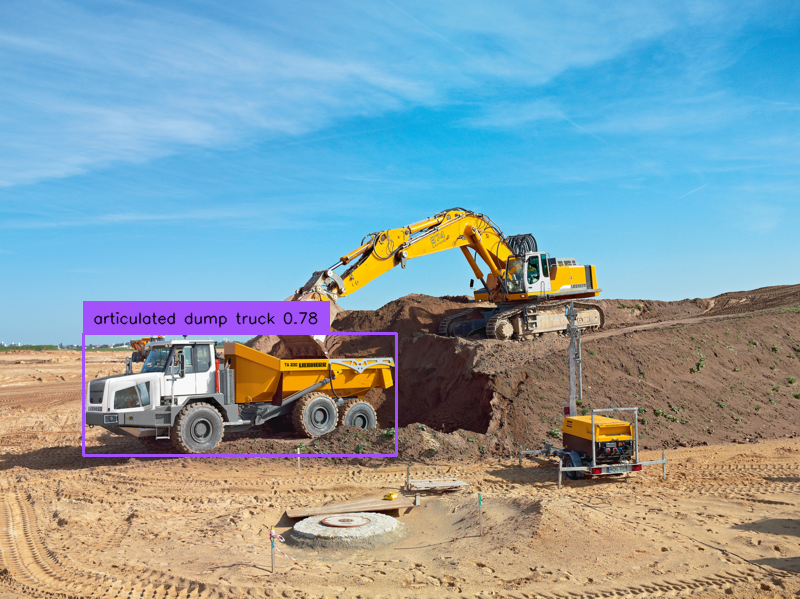

In [19]:
i = 0
box = boxes_xywh[i]
logit = logits[i]
class_name = classes[i]
annotated_frame = annotate(img, [box], [logit], [class_name])
annotated_frame.save("ann_0.png")
annotated_frame

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


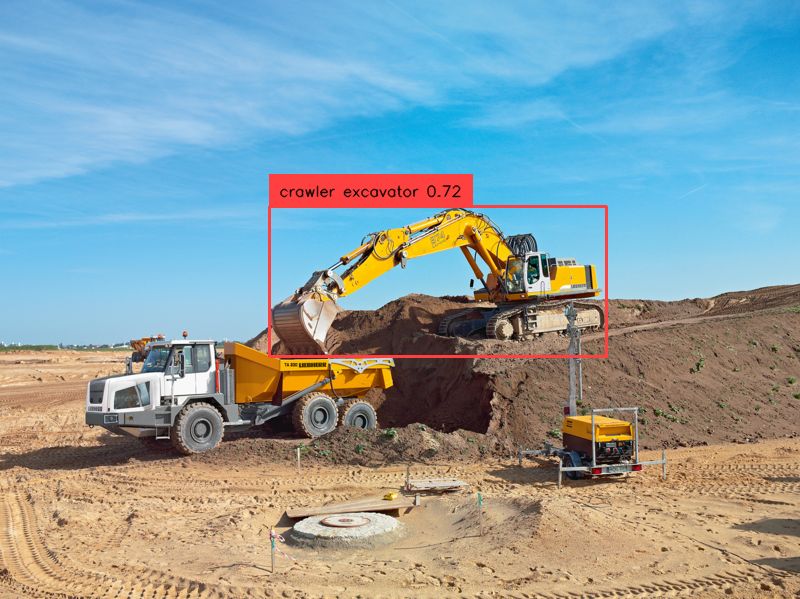

In [20]:
label_dict_trick = {
    "boxes": [
        [
            2.0,
            2.0,
            0.0,
            0.0,
        ],
        [
            0.5473994612693787,
            0.4699993133544922,
            0.4211714267730713,
            0.250853031873703,
        ],
    ],
    "logits": [0, 0.7161567807197571],
    "classes": ["", "crawler excavator"],
}
boxes_xywh = label_dict_trick["boxes"]
logits = label_dict_trick["logits"]
classes = label_dict_trick["classes"]
annotated_frame = annotate(img, boxes_xywh, logits, classes)
annotated_frame.save("ann_1.png")
annotated_frame

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


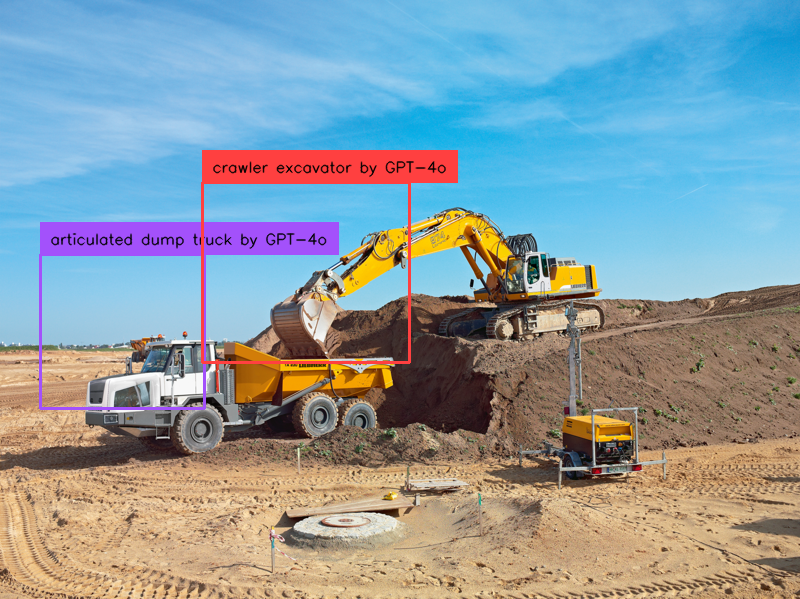

In [11]:
boxes_xywh = response_gpt["boxes"]
logits = None
classes = response_gpt["classes"]
annotated_frame = annotate(img, boxes_xywh, logits, classes)
# annotated_frame.save("ann_gpt.png")
annotated_frame

## instances per category

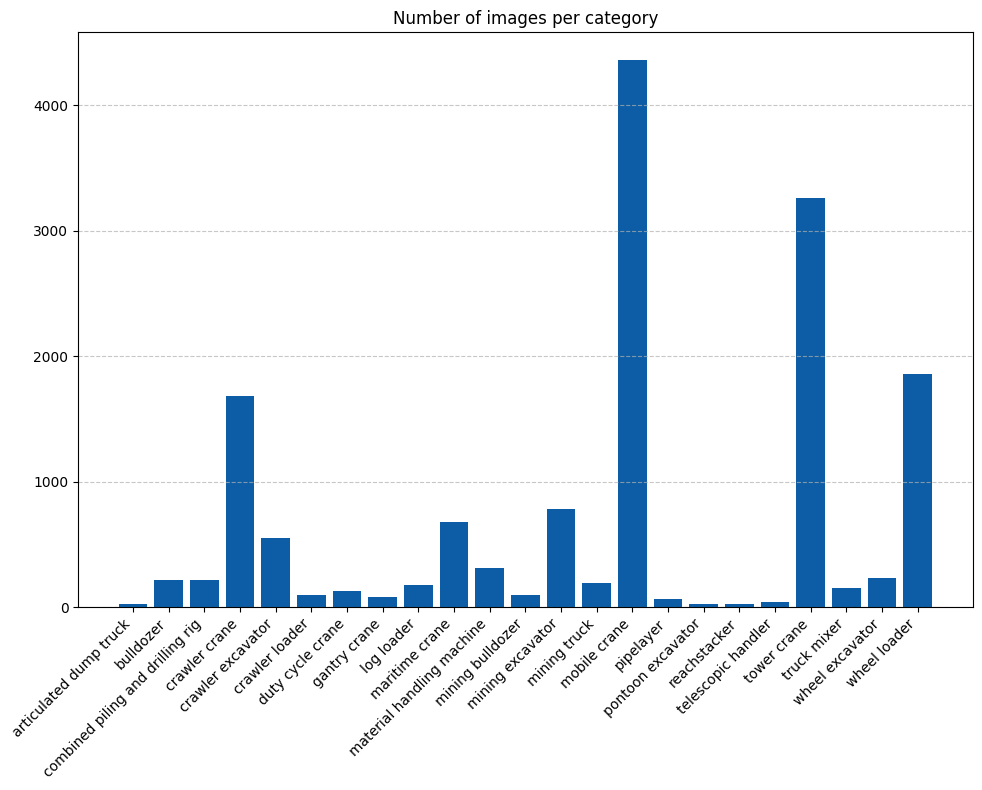

In [1]:
from pathlib import Path
import json
import matplotlib.pyplot as plt

# Define the base directory
dataset_dir = Path("/mnt/ssd2/xin/repo/DART/Liebherr_Product")

# Define the images directory and duplicates directory using Path objects
image_dir = dataset_dir / "images"
meta_dir = dataset_dir / "metadata"
label_dir = dataset_dir / "labels"

with open(label_dir / "stats_obj.json", "r") as f:
    stats_obj = json.load(f)["nms"]

categories = []
counts = []
for obj in stats_obj:
    categories.append(obj)
    counts.append(stats_obj[obj]["num_img"])

# Create the vertical bar plot
plt.figure(figsize=(10, 8))
plt.bar(categories, counts, color="#0C5DA5")
plt.title("Number of images per category", fontsize=12)

# Customize plot for publication
plt.xticks(
    rotation=45, ha="right"
)  # Rotate category labels for better readability and make them more compact
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Ensure layout is tight and labels are not cut off
plt.tight_layout()

# Save the figure
plt.savefig("n_img_per_category.png", dpi=300)

# Show the plot
plt.show()

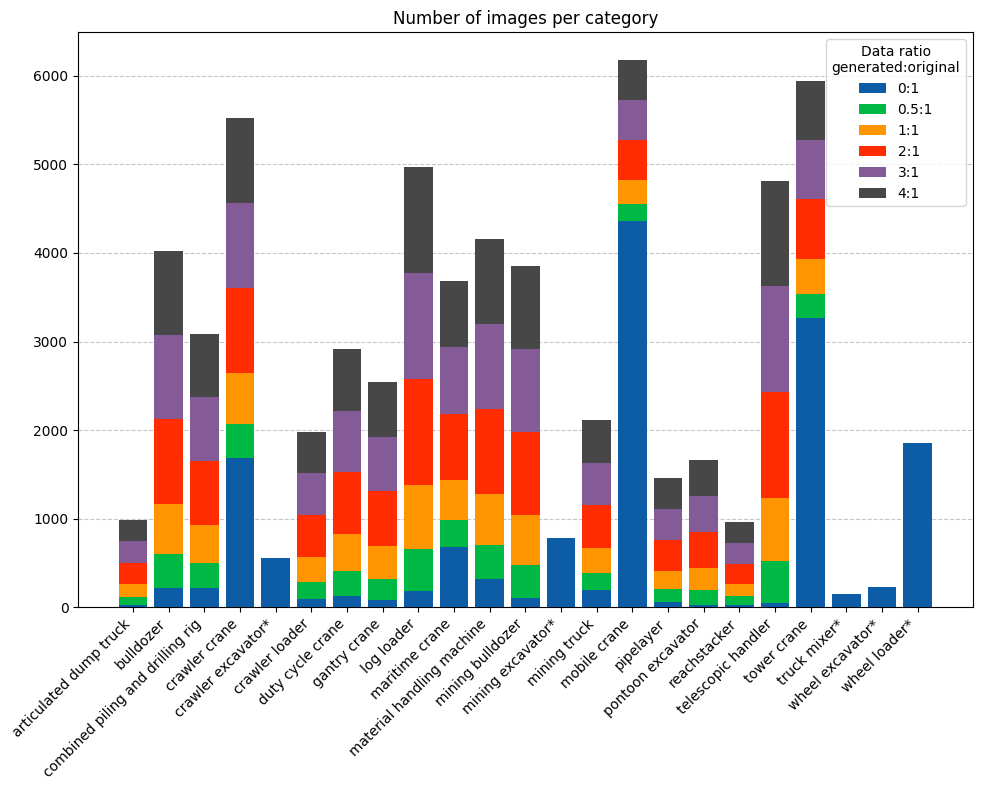

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Given original data
category_counts = {
    "articulated dump truck": 24,
    "bulldozer": 215,
    "combined piling and drilling rig": 213,
    "crawler crane": 1687,
    "crawler excavator*": 553,
    "crawler loader": 97,
    "duty cycle crane": 131,
    "gantry crane": 78,
    "log loader": 179,
    "maritime crane": 681,
    "material handling machine": 316,
    "mining bulldozer": 100,
    "mining excavator*": 786,
    "mining truck": 193,
    "mobile crane": 4365,
    "pipelayer": 62,
    "pontoon excavator": 29,
    "reachstacker": 27,
    "telescopic handler": 43,
    "tower crane": 3266,
    "truck mixer*": 154,
    "wheel excavator*": 232,
    "wheel loader*": 1857,
}

# New data added in 5 batches
filter_counts = {
    "articulated dump truck": [96, 144, 239, 239, 239],
    "bulldozer": [383, 571, 951, 951, 951],
    "combined piling and drilling rig": [288, 432, 719, 719, 719],
    "crawler crane": [384, 575, 958, 959, 958],
    "crawler excavator*": [0, 0, 0, 0, 0],
    "crawler loader": [189, 283, 471, 471, 471],
    "duty cycle crane": [279, 418, 696, 696, 696],
    "gantry crane": [246, 369, 615, 615, 615],
    "log loader": [481, 719, 1199, 1199, 1199],
    "maritime crane": [302, 450, 750, 750, 749],
    "material handling machine": [384, 576, 959, 960, 959],
    "mining bulldozer": [376, 562, 938, 938, 938],
    "mining excavator*": [0, 0, 0, 0, 0],
    "mining truck": [192, 288, 480, 480, 480],
    "mobile crane": [183, 272, 454, 454, 454],
    "pipelayer": [141, 210, 350, 350, 350],
    "pontoon excavator": [163, 245, 407, 407, 407],
    "reachstacker": [94, 139, 233, 233, 232],
    "telescopic handler": [478, 716, 1194, 1194, 1193],
    "tower crane": [268, 402, 670, 670, 670],
    "truck mixer*": [0, 0, 0, 0, 0],
    "wheel excavator*": [0, 0, 0, 0, 0],
    "wheel loader*": [0, 0, 0, 0, 0],
}

# Prepare data for plotting
categories = list(category_counts.keys())
original_counts = list(category_counts.values())

# Colors from scienceplots
colors = ["#0C5DA5", "#00B945", "#FF9500", "#FF2C00", "#845B97", "#474747", "#9e9e9e"]
labels = ["0.5:1", "1:1", "2:1", "3:1", "4:1"]

# Create the figure
plt.figure(figsize=(10, 8))

# Plot original data
bottom = np.array(original_counts)
plt.bar(categories, original_counts, label="0:1", color=colors[0], zorder=3)

# Plot new data batches
for i, batch_label in enumerate(labels):
    batch_counts = [filter_counts[category][i] for category in categories]
    plt.bar(
        categories,
        batch_counts,
        bottom=bottom,
        label=batch_label,
        color=colors[i + 1],
        zorder=3,
    )
    bottom += np.array(batch_counts)

# Customize plot for publication
plt.title("Number of images per category", fontsize=12)
plt.xticks(
    rotation=45, ha="right"
)  # Rotate category labels for better readability and make them more compact
plt.yticks()
plt.grid(
    axis="y", linestyle="--", alpha=0.7, zorder=1
)  # Set grid zorder to be lower to avoid cutting the bar

leg = plt.legend(
    title="Data ratio\ngenerated:original",
    fontsize=10,
    title_fontsize=10,
    loc="upper right",
)
leg.get_title().set_multialignment("center")

# Ensure layout is tight and labels are not cut off
plt.tight_layout()

# Save the figure
plt.savefig("n_img_per_category_stacked.png", dpi=300)

# Show the plot
plt.show()

## average score of gdino by category

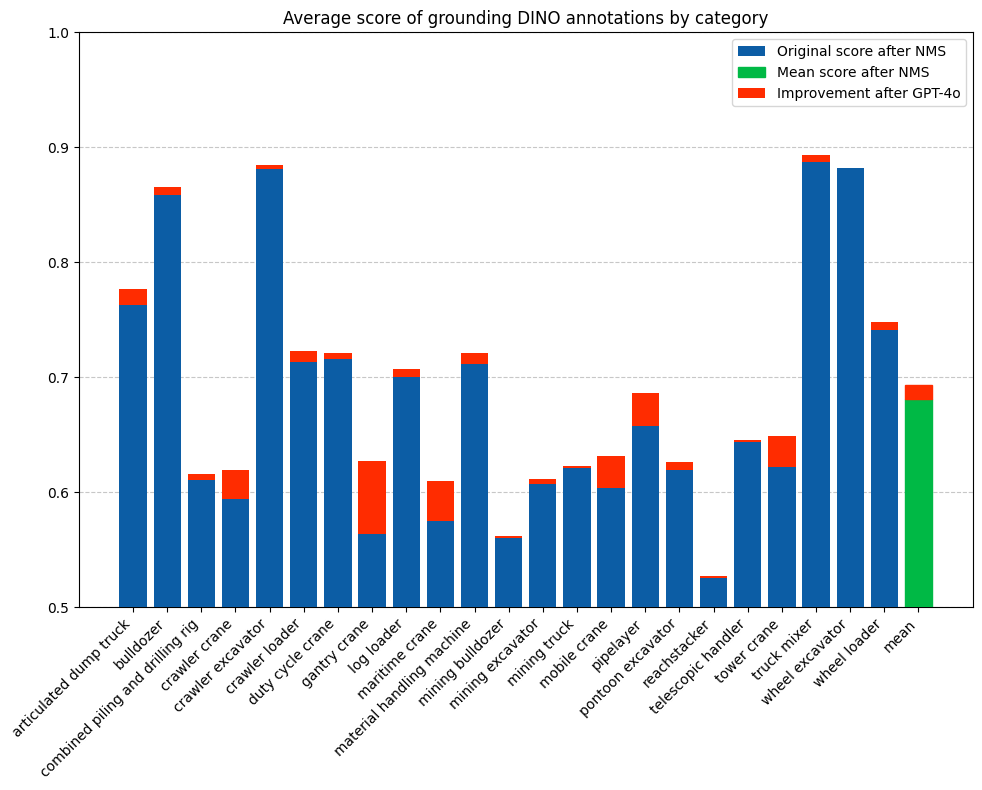

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Original scores (renamed to nms)
nms = {
    "articulated dump truck": {"avg_score": 0.7626331070294747},
    "bulldozer": {"avg_score": 0.8585267993536863},
    "combined piling and drilling rig": {"avg_score": 0.6110182845988215},
    "crawler crane": {"avg_score": 0.5940714322393005},
    "crawler excavator": {"avg_score": 0.8813499633975873},
    "crawler loader": {"avg_score": 0.7135173527850318},
    "duty cycle crane": {"avg_score": 0.7156156908582758},
    "gantry crane": {"avg_score": 0.5635202672423386},
    "log loader": {"avg_score": 0.6999041927124255},
    "maritime crane": {"avg_score": 0.5749042733681474},
    "material handling machine": {"avg_score": 0.7117064729607179},
    "mining bulldozer": {"avg_score": 0.5619397429586614},
    "mining excavator": {"avg_score": 0.6067729928812315},
    "mining truck": {"avg_score": 0.6210931645285699},
    "mobile crane": {"avg_score": 0.6036010618720736},
    "pipelayer": {"avg_score": 0.6575775728110345},
    "pontoon excavator": {"avg_score": 0.618944376707077},
    "reachstacker": {"avg_score": 0.5268242454954556},
    "telescopic handler": {"avg_score": 0.6438463433664672},
    "tower crane": {"avg_score": 0.6219530407713224},
    "truck mixer": {"avg_score": 0.8875504823975593},
    "wheel excavator": {"avg_score": 0.8815716549941187},
    "wheel loader": {"avg_score": 0.7409805514781098},
}

# Improved scores (renamed to nms_gpt)
nms_gpt = {
    "articulated dump truck": {"avg_score": 0.7764213544627031},
    "bulldozer": {"avg_score": 0.8659036685195234},
    "combined piling and drilling rig": {"avg_score": 0.6155813819982788},
    "crawler crane": {"avg_score": 0.6195114595717506},
    "crawler excavator": {"avg_score": 0.8849353240953909},
    "crawler loader": {"avg_score": 0.7232225277322404},
    "duty cycle crane": {"avg_score": 0.7210826894099062},
    "gantry crane": {"avg_score": 0.6271787573371017},
    "log loader": {"avg_score": 0.7075801348686218},
    "maritime crane": {"avg_score": 0.6100786178783103},
    "material handling machine": {"avg_score": 0.7206643997064603},
    "mining bulldozer": {"avg_score": 0.5598187673216065},
    "mining excavator": {"avg_score": 0.6112153119332081},
    "mining truck": {"avg_score": 0.6229371757287047},
    "mobile crane": {"avg_score": 0.6316089842934283},
    "pipelayer": {"avg_score": 0.6863475393165241},
    "pontoon excavator": {"avg_score": 0.6267160549759865},
    "reachstacker": {"avg_score": 0.5255975949764252},
    "telescopic handler": {"avg_score": 0.6452235852150207},
    "tower crane": {"avg_score": 0.6488820139253348},
    "truck mixer": {"avg_score": 0.8932025853995305},
    "wheel excavator": {"avg_score": 0.8815716549941187},
    "wheel loader": {"avg_score": 0.7476919695767231},
}

categories = list(nms.keys())
original_avg_scores = [nms[cat]["avg_score"] for cat in categories]
improved_avg_scores = [nms_gpt[cat]["avg_score"] for cat in categories]

# Calculating mean scores
mean_original = np.mean(original_avg_scores)
mean_improved = np.mean(improved_avg_scores)

# Adding mean category
categories.append("mean")
original_avg_scores.append(mean_original)
improved_avg_scores.append(mean_improved)

colors = ["#0C5DA5", "#00B945", "#FF9500", "#FF2C00", "#845B97", "#474747", "#9e9e9e"]

# Creating the plot
x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10, 8))

bar1 = ax.bar(
    x, original_avg_scores, label="Original score after NMS", color=colors[0], zorder=3
)
bar2 = ax.bar(
    x,
    [
        improved - original
        for original, improved in zip(original_avg_scores, improved_avg_scores)
    ],
    label="Improvement after GPT-4o",
    color=colors[3],
    bottom=original_avg_scores,
    zorder=3,
)

# Change the color of the mean bar
bar1[-1].set_color(colors[1])
bar2[-1].set_color(colors[3])

# Create a custom patch for the mean category
mean_patch = mpatches.Patch(color=colors[1])

# Adding back the original legend entries with mean in the middle
handles, labels = ax.get_legend_handles_labels()
new_handles = [handles[0], mean_patch, handles[1]]
new_labels = [labels[0], "Mean score after NMS", labels[1]]
ax.legend(new_handles, new_labels, loc="upper right")

# ax.set_xlabel('Category')
# ax.set_ylabel('Average Score')
ax.set_title("Average score of grounding DINO annotations by category")
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha="right")

ax.grid(axis="y", linestyle="--", alpha=0.7, zorder=1)

ax.set_ylim(0.5, 1)

# ax.legend()

plt.tight_layout()

plt.savefig("gdino_score.png", dpi=300)

plt.show()

## gpt4o confusion matrix

In [20]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from pathlib import Path
import warnings

# Confusion matrices
matrix1 = np.array([[0.85, 0.15], [0.16, 0.84]])
matrix2 = np.array([[0.75, 0.25], [0.12, 0.88]])


def plot_confusion_matrix(
    matrix,
    normalize=True,
    names=(),
    xlabel=None,
    ylabel=None,
    save_dir="",
    filename="confusion_matrix.png",
):
    array = matrix / (
        (matrix.sum(0).reshape(1, -1) + 1e-9) if normalize else 1
    )  # normalize columns
    array[array < 0.005] = np.nan  # don't annotate (would appear as 0.00)

    fig, ax = plt.subplots(1, 1, figsize=(4, 3), tight_layout=True)
    nc, nn = matrix.shape[0], len(names)  # number of classes, names
    sn.set(font_scale=1.0 if nc < 50 else 0.8)  # for label size
    labels = (0 < nn < 99) and (nn == nc)  # apply names to ticklabels
    # ticklabels = (names + ['background']) if labels else 'auto'
    ticklabels = names if labels else "auto"
    with warnings.catch_warnings():
        warnings.simplefilter(
            "ignore"
        )  # suppress empty matrix RuntimeWarning: All-NaN slice encountered
        sn.heatap(
            array,
            ax=ax,
            annot=nc < 30,
            annot_kws={"size": 12},
            cap="Blues",
            fmt=".2f",
            square=True,
            vmin=0.0,
            xticklabels=ticklabels,
            yticklabels=ticklabels,
        ).set_facecolor((1, 1, 1))
    ax.set_xlabel(xlabel if xlabel is not None else "True")
    ax.set_ylabel(ylabel if ylabel is not None else "Predicted")
    ax.set_title("Confusion matrix" + (" normalized" if normalize else ""))
    fig.savefig(Path(save_dir) / filename, dpi=250)
    plt.close(fig)


# Plot and save the confusion matrices
plot_confusion_matrix(
    matrix1,
    normalize=True,
    names=("No", "Yes"),
    xlabel="Human average",
    ylabel="GPT-4o",
    save_dir=".",
    filename="confusion_matrix_gpt4o_human.png",
)
plot_confusion_matrix(
    matrix2,
    normalize=True,
    names=("No", "Yes"),
    xlabel="Human 1",
    ylabel="Human 2",
    save_dir=".",
    filename="confusion_matrix_human_human.png",
)

## dreambooth #images per instance

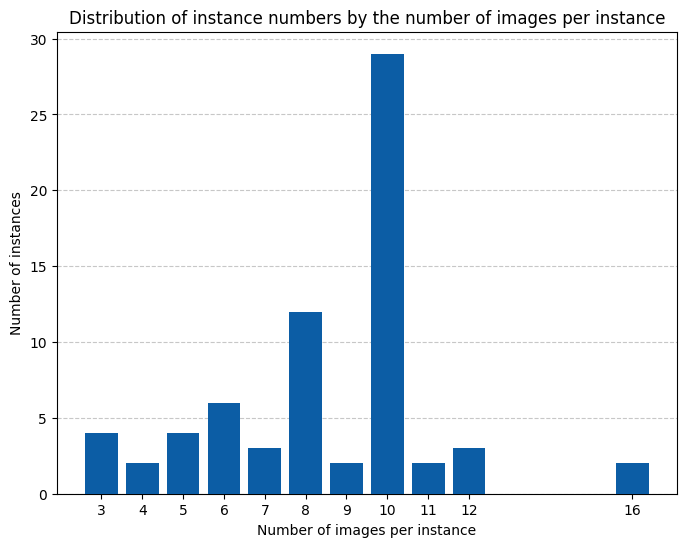

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

# List of file counts
file_counts = [
    12,
    10,
    10,
    9,
    8,
    11,
    10,
    10,
    10,
    8,
    10,
    9,
    10,
    10,
    10,
    8,
    10,
    10,
    10,
    12,
    5,
    3,
    5,
    7,
    10,
    6,
    6,
    5,
    3,
    7,
    10,
    6,
    6,
    10,
    8,
    10,
    10,
    10,
    8,
    10,
    10,
    8,
    8,
    10,
    10,
    6,
    10,
    4,
    3,
    7,
    3,
    12,
    16,
    8,
    6,
    4,
    10,
    8,
    10,
    16,
    11,
    10,
    10,
    5,
    8,
    10,
    8,
    8,
    10,
]

# Count the occurrences of each number
count_dict = Counter(file_counts)

# Prepare data for plotting
numbers = list(count_dict.keys())
frequencies = list(count_dict.values())

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(numbers, frequencies, color="#0C5DA5", zorder=3)

# Add titles and labels
plt.title("Distribution of instance numbers by the number of images per instance")
plt.ylabel("Number of instances")
plt.xlabel("Number of images per instance")
plt.xticks(numbers)

plt.grid(axis="y", linestyle="--", alpha=0.7, zorder=1)

plt.savefig("instance_distribution.png", dpi=300)

# Show the plot
plt.show()